# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
pip install citipy


     ---------------------------------------- 0.0/675.6 kB ? eta -:--:--
      --------------------------------------- 10.2/675.6 kB ? eta -:--:--
     -- ---------------------------------- 41.0/675.6 kB 393.8 kB/s eta 0:00:02
     ---------- --------------------------- 184.3/675.6 kB 1.2 MB/s eta 0:00:01
     -------------------------------------  665.6/675.6 kB 4.2 MB/s eta 0:00:01
     -------------------------------------- 675.6/675.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675977 sha256=bbc9f99544ec33137ca33ec9ab8280ce0fae51edaf9ad58b8a1e99af4b94fa02
  Stored in directory: c:\users\x579430\appdata\local\pip\cache\wheels\41\82\37\8bb56372b0d828d226b83e0117780ecbe9f409100ac52364bd
Successfully built citipy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_json["coord"]["lat"]
        city_lng = city_json["coord"]["lon"]
        city_max_temp = city_json["main"]["temp_max"]
        city_humidity = city_json["main"]["humidity"]
        city_clouds = city_json["clouds"]["all"]
        city_wind = city_json["wind"]["speed"]
        city_country = city_json["sys"]["country"]
        city_date = city_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | talnakh
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | broome
Processing Record 8 of Set 1 | taiohae
City not found. Skipping...
Processing Record 9 of Set 1 | san agustin de valle fertil
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | viedma
Processing Record 12 of Set 1 | newman
Processing Record 13 of Set 1 | mazagao
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | kaiapoi
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | dadukou
Processing Record 20 of Set 1 | windsor
Processing Record 21 of Set 1 | keflavik
Processing Record

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,283.21,62,75,12.35,CL,1728769553
1,talnakh,69.4865,88.3972,267.17,94,100,4.20,RU,1728769316
2,iqaluit,63.7506,-68.5145,277.00,80,75,4.63,CA,1728769555
3,papatowai,-46.5619,169.4708,279.72,82,99,3.20,NZ,1728769556
4,edinburgh of the seven seas,-37.0676,-12.3116,286.23,76,57,4.68,SH,1728769558


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

#convert max temp from Kelvin to Celsius
city_data_df['Max Temp (C)'] = city_data_df['Max Temp'] - 273.15
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,283.21,62,75,12.35,CL,1728769553,10.06
1,talnakh,69.4865,88.3972,267.17,94,100,4.20,RU,1728769316,-5.98
2,iqaluit,63.7506,-68.5145,277.00,80,75,4.63,CA,1728769555,3.85
3,papatowai,-46.5619,169.4708,279.72,82,99,3.20,NZ,1728769556,6.57
4,edinburgh of the seven seas,-37.0676,-12.3116,286.23,76,57,4.68,SH,1728769558,13.08


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

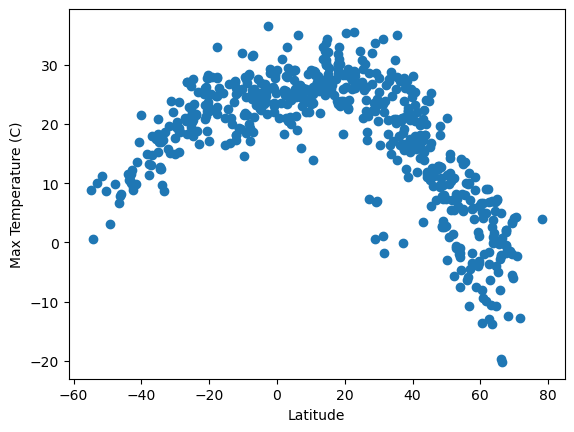

In [3]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df.iloc[:,1],city_data_df.iloc[:,9])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

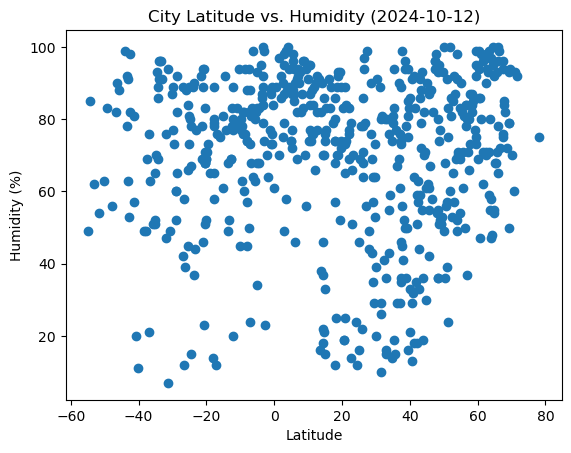

In [4]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df.iloc[:,1],city_data_df.iloc[:,4])


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2024-10-12)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

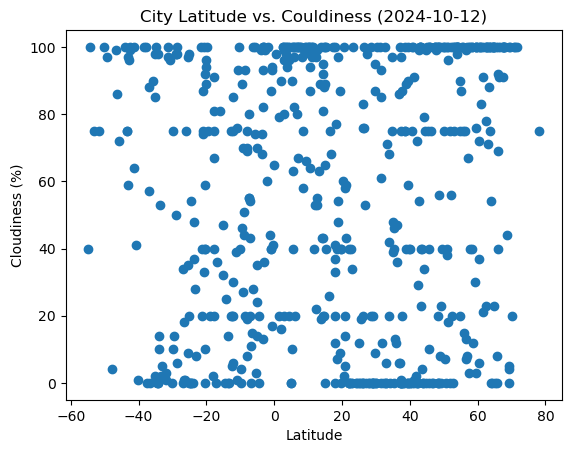

In [5]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df.iloc[:,1],city_data_df.iloc[:,5])


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Couldiness (2024-10-12)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

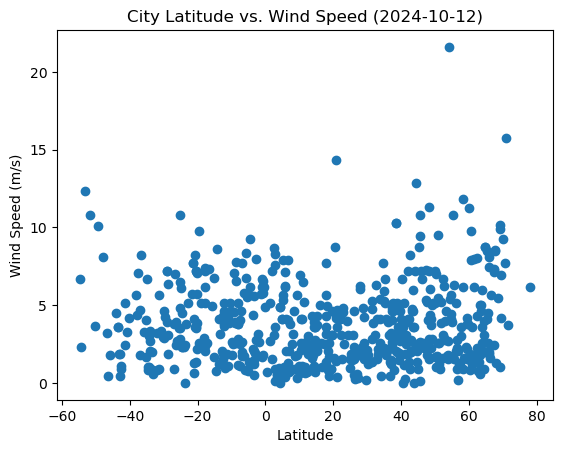

In [6]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df.iloc[:,1],city_data_df.iloc[:,6])


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2024-10-12)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linregress(
    x: Any,
    y: Any | None = None,
    alternative: str = 'two-sided'
)

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
1,talnakh,69.4865,88.3972,267.17,94,100,4.20,RU,1728769316,-5.98
2,iqaluit,63.7506,-68.5145,277.00,80,75,4.63,CA,1728769555,3.85
6,broome,42.2506,-75.8330,287.40,59,72,1.95,US,1728769560,14.25
10,newman,37.3138,-121.0208,300.39,46,0,4.02,US,1728769565,27.24
12,ilulissat,69.2167,-51.1000,271.16,50,0,1.03,GL,1728769567,-1.99


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,283.21,62,75,12.35,CL,1728769553,10.06
3,papatowai,-46.5619,169.4708,279.72,82,99,3.20,NZ,1728769556,6.57
4,edinburgh of the seven seas,-37.0676,-12.3116,286.23,76,57,4.68,SH,1728769558,13.08
5,waitangi,-43.9535,-176.5597,284.72,99,100,4.47,NZ,1728769559,11.57
7,san agustin de valle fertil,-30.6335,-67.4682,295.17,49,96,3.37,AR,1728769562,22.02


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.67


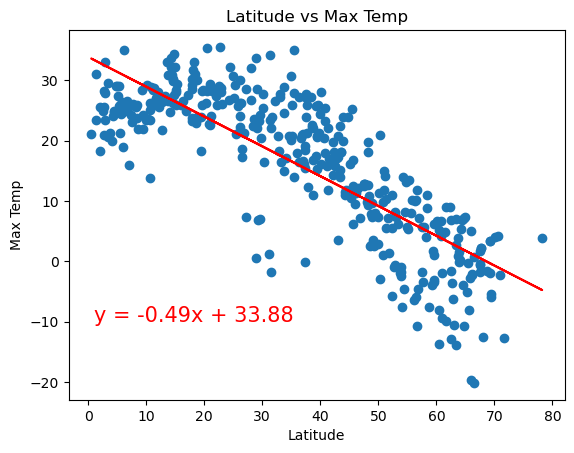

In [32]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp (C)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1.0,-10.0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs Max Temp')
print(f"The r^2-value is: {round(rvalue**2,2)}")
plt.show()

The r^2-value is: 0.59


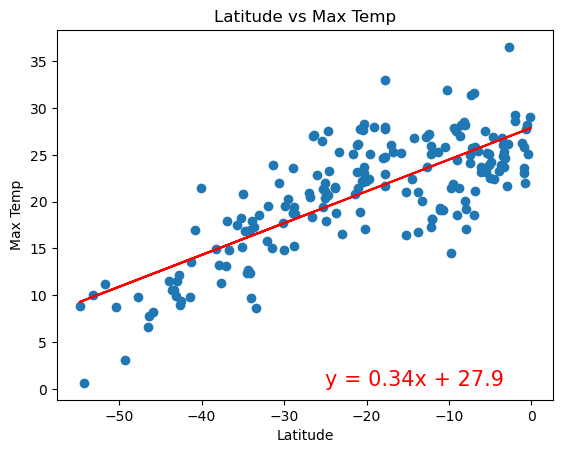

In [30]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp (C)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25.0,0.3),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs Max Temp')
print(f"The r^2-value is: {round(rvalue**2,2)}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.00011


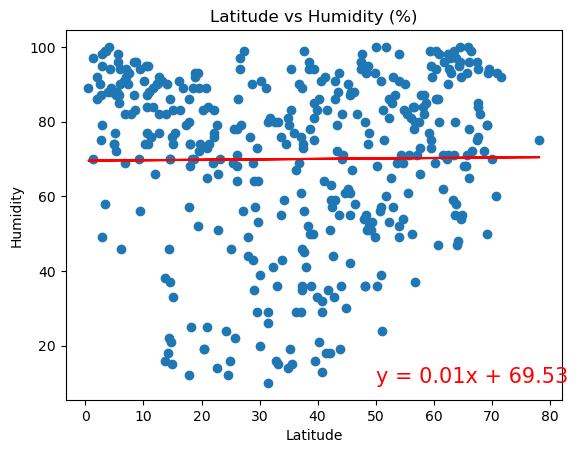

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50.0,10.0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity (%)')
print(f"The r^2-value is: {round(rvalue**2,5)}")
plt.show()

The r^2-value is: 0.01539


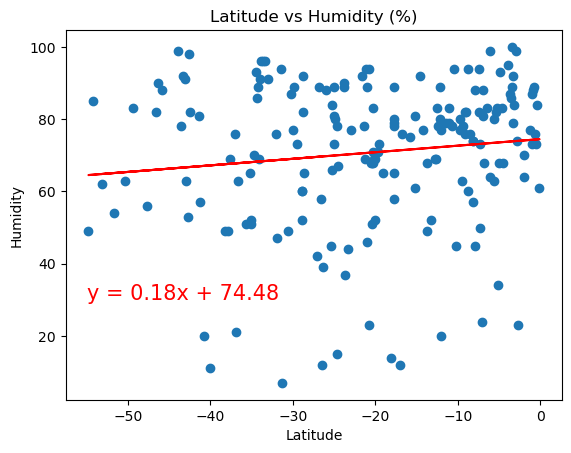

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55.0,30.0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity (%)')
print(f"The r^2-value is: {round(rvalue**2,5)}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.00079


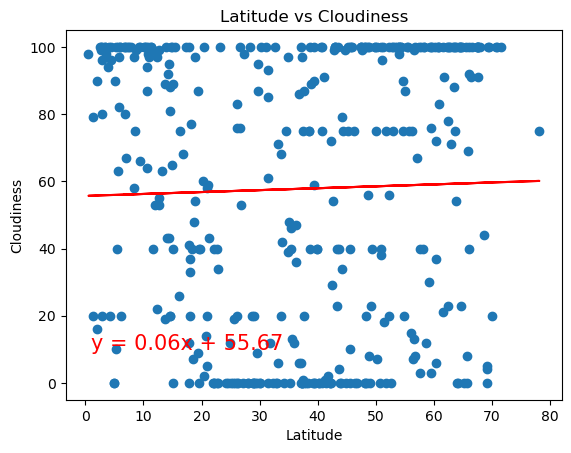

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1.0,10.0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')
print(f"The r^2-value is: {round(rvalue**2,5)}")
plt.show()

The r^2-value is: 0.00975


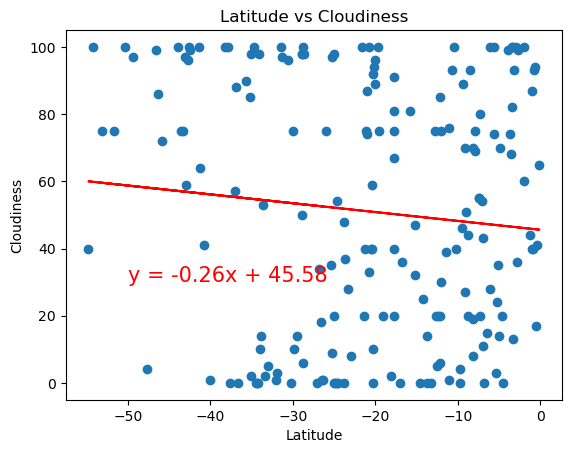

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50.0,30.0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')
print(f"The r^2-value is: {round(rvalue**2,5)}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0504


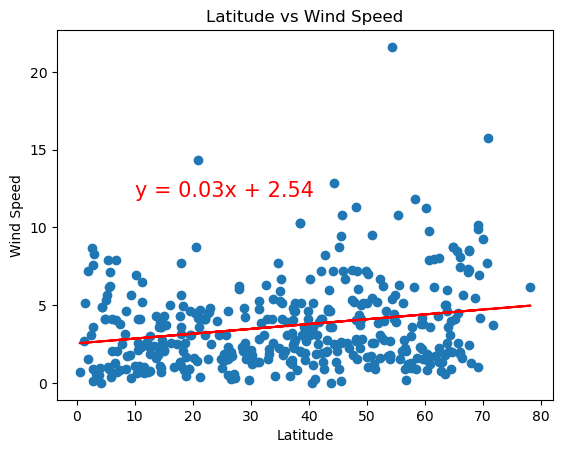

In [53]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10.0,12.0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')
print(f"The r^2-value is: {round(rvalue**2,5)}")
plt.show()

The r^2-value is: 0.0005


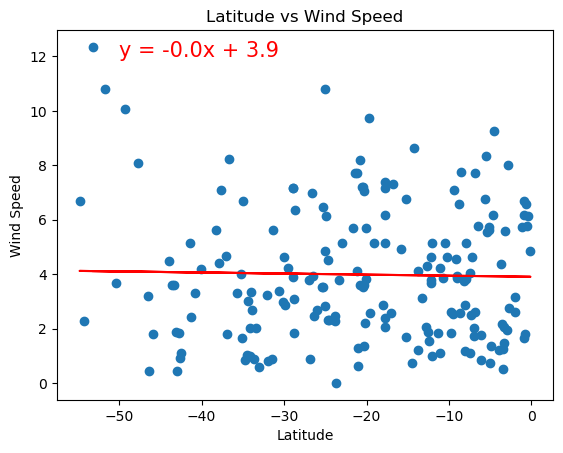

In [52]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50.0,12.0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')
print(f"The r^2-value is: {round(rvalue**2,5)}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE